In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_entropy(x):
    log = np.array([-xi * np.log2(xi) for xi in x])
    entropy = np.sum(log)
    return entropy

In [9]:
X = np.random.uniform(size=100)

In [18]:
Y = np.random.binomial(n=3, p=0.8, size=10)

In [19]:
calculate_entropy(Y)

-31.019550008653873

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

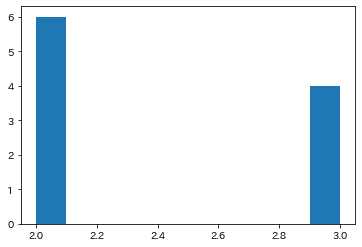

In [20]:
plt.hist(Y)

In [22]:
Z = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [23]:
calculate_entropy(Z)

2.321928094887362

In [7]:
def compute_sample_entropy(x):
    n = len(x)
    sample_entropy = np.sum(np.log2(x)) * 1/n
    return -sample_entropy

In [8]:
x = [0.1, 0.1, 0.9, 0.1]
compute_sample_entropy(x)

2.529446844526784

In [16]:
calculate_entropy(x)

1.1333812125667537

In [13]:
n = 25
sequences = [0.1]*n + [0.9]*(0)

In [14]:
len(sequences)

25

In [24]:
n = 25
epsilon = 0.2
typical_sets = []
entropy = calculate_entropy([0.1, 0.9])
for i in range(n):
    sequences = [.1]*i + [.9]*(n-i)
    sample_ent = compute_sample_entropy(sequences)
    print(sample_ent, entropy)
    if np.abs(sample_ent - entropy) < epsilon:
        typical_sets.append(sequences)

0.15200309344504995 0.4689955935892812
0.2788000935027425 0.4689955935892812
0.405597093560435 0.4689955935892812
0.5323940936181275 0.4689955935892812
0.65919109367582 0.4689955935892812
0.7859880937335124 0.4689955935892812
0.912785093791205 0.4689955935892812
1.0395820938488973 0.4689955935892812
1.16637909390659 0.4689955935892812
1.2931760939642825 0.4689955935892812
1.4199730940219748 0.4689955935892812
1.5467700940796676 0.4689955935892812
1.67356709413736 0.4689955935892812
1.8003640941950525 0.4689955935892812
1.9271610942527448 0.4689955935892812
2.053958094310437 0.4689955935892812
2.1807550943681298 0.4689955935892812
2.3075520944258225 0.4689955935892812
2.434349094483515 0.4689955935892812
2.561146094541207 0.4689955935892812
2.6879430945988996 0.4689955935892812
2.814740094656592 0.4689955935892812
2.9415370947142843 0.4689955935892812
3.0683340947719775 0.4689955935892812
3.19513109482967 0.4689955935892812


In [20]:
entropy = calculate_entropy([0.1, 0.9])
print(entropy)

0.4689955935892812


In [23]:
typical_sets

[[0.1,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9],
 [0.1,
  0.1,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9],
 [0.1,
  0.1,
  0.1,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9],
 [0.1,
  0.1,
  0.1,
  0.1,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9]]

In [33]:
from scipy.special import comb

typical_prob = 0
for i in range(1, 5):
    typical_prob += comb(4, i, exact=True) * (0.9)**(4-i) * (0.1)**i

In [34]:
typical_prob

0.34390000000000004

In [44]:
typical_prob = 0.344
expected_length = 3 * typical_prob + 6 * (1 - typical_prob)

In [45]:
expected_length/25

0.19872

In [47]:
comb(18, 1, exact=True) + comb(18, 2, exact=True) + comb(18, 3, exact=True) + comb(18, 4, exact=True)

4047

In [6]:
from scipy.special import comb

prob = 0
for i in range(3):
    prob += comb(5, i, exact=True) * (0.1)**(i) * (0.9)**(5-i)

In [7]:
prob

0.40095000000000003

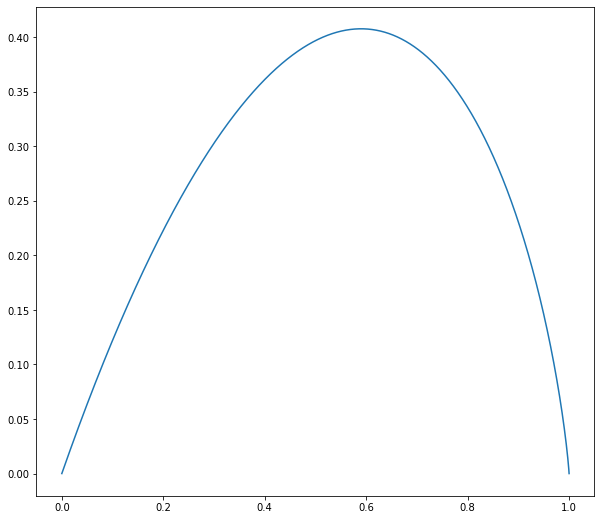

In [36]:
import matplotlib.pyplot as plt
probability = np.linspace(np.finfo(float).eps, 1-np.finfo(float).eps, 10000)
mutual_informations = []

for p in probability:
    X = [1-p, p]
#     print(X)
    Y = [5/15*(1-p), 4/15*(1-p), 3/15+3/10*p, 2/15+1/6*p, 1/15+2/15*p]
#     print(np.sum(Y))
    XY = [5/15*(1-p), 4/15*(1-p), 3/15*(1-p), 2/15*(1-p), 1/15*(1-p), 10/20*p, 6/20*p, 4/20*p]
#     print(np.sum(XY))
    
    mutual_information = calculate_entropy(X) + calculate_entropy(Y) - calculate_entropy(XY)
    mutual_informations.append(mutual_information)
    

plt.figure(figsize=(10,9))
plt.plot(probability, mutual_informations)
plt.savefig('mutual_info_homework7.png')

In [33]:
capacity = np.max(mutual_informations)
capacity

0.40766739429419374

In [34]:
index = np.argmax(mutual_informations)
probability[index]

0.5900590059356836

In [21]:
calculate_entropy(XY)

/Users/kreutzer/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/Users/kreutzer/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


nan

In [8]:
p[:100]

array([0.1       , 0.10009001, 0.10018002, 0.10027003, 0.10036004,
       0.10045005, 0.10054005, 0.10063006, 0.10072007, 0.10081008,
       0.10090009, 0.1009901 , 0.10108011, 0.10117012, 0.10126013,
       0.10135014, 0.10144014, 0.10153015, 0.10162016, 0.10171017,
       0.10180018, 0.10189019, 0.1019802 , 0.10207021, 0.10216022,
       0.10225023, 0.10234023, 0.10243024, 0.10252025, 0.10261026,
       0.10270027, 0.10279028, 0.10288029, 0.1029703 , 0.10306031,
       0.10315032, 0.10324032, 0.10333033, 0.10342034, 0.10351035,
       0.10360036, 0.10369037, 0.10378038, 0.10387039, 0.1039604 ,
       0.10405041, 0.10414041, 0.10423042, 0.10432043, 0.10441044,
       0.10450045, 0.10459046, 0.10468047, 0.10477048, 0.10486049,
       0.1049505 , 0.1050405 , 0.10513051, 0.10522052, 0.10531053,
       0.10540054, 0.10549055, 0.10558056, 0.10567057, 0.10576058,
       0.10585059, 0.10594059, 0.1060306 , 0.10612061, 0.10621062,
       0.10630063, 0.10639064, 0.10648065, 0.10657066, 0.10666